In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
# spatial subscript
state_names = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia']

# non-spatial subscript
variant_list = ["Delta", 'Omicron', "BA5"]
vax_status_list = ['Vx', 'NVx']

state_lst_1=[]
state_lst_2=[]
state_lst_3=[]
state_lst_4=[]
state_lst_5=[]
state_lst_6=[]
for name in state_names:
    state_lst_1.append(f"Impact of Treatment on Fatality Rate[{name}]")
    state_lst_2.append(f"Base Fatality Rate for Unit Acuity[{name}]")
    state_lst_3.append(f"Reference Force of Infection[{name}]")
    state_lst_4.append(f"Strength of Adherence Fatigue[{name}]")
    state_lst_5.append(f"Variant Intro Start Time[{name}]")
    state_lst_6.append(f"Variant Intro Start Time2[{name}]")

param_lst_lst=[
    state_lst_1, # ['Impact of Treatment on Fatality Rate[Alabama]', 'Impact of Treatment on Fatality Rate[Alaska]' ...]
    state_lst_2,
    state_lst_3,
    state_lst_4,
    state_lst_5,
    state_lst_6,
    ['Extra Vaccine Impact on Responsiveness[Vx]'],
    ['Extra Vaccine Impact on Responsiveness[NVx]'],
    ['Extra Vaccine Impact on Responsiveness[Naive]'],
    ['Immunity Loss Time[Vx]'],
    ['Immunity Loss Time[NVx]'],
    ['Immunity Loss Time[Naive]'],
    ['Variant Accuity Multiplier[Omicron]'],
    ['Variant Accuity Multiplier[Delta]'],
    ['Variant Accuity Multiplier[BA5]'],
    ['Variant Impact on Immunity Loss Time[Omicron]'],
    ['Variant Impact on Immunity Loss Time[Delta]'],
    ['Variant Impact on Immunity Loss Time[BA5]'],
    ['Variant Intro Start Time3'],
    ['Variant Transmission Multiplier[Omicron]'],
    ['Variant Transmission Multiplier[Delta]'],
    ['Variant Transmission Multiplier[BA5]']
]

vv_param_names=['Variant Impact on Immunity Loss Time[Omicron]',
 'Variant Impact on Immunity Loss Time[Delta]',
 'Variant Impact on Immunity Loss Time[BA5]',
 'Impact of Treatment on Fatality Rate',
 'Base Fatality Rate for Unit Acuity',
 'Reference Force of Infection',
 'Strength of Adherence Fatigue',
 'Variant Intro Start Time',
 'Variant Intro Start Time2',
 'Extra Vaccine Impact on Responsiveness[Vx]',
 'Extra Vaccine Impact on Responsiveness[NVx]',
 'Extra Vaccine Impact on Responsiveness[Naive]',
 'Immunity Loss Time[Vx]',
 'Immunity Loss Time[NVx]',
 'Immunity Loss Time[Naive]',
 'Variant Accuity Multiplier[Omicron]',
 'Variant Accuity Multiplier[Delta]',
 'Variant Accuity Multiplier[BA5]',
 'Variant Intro Start Time3',
 'Variant Transmission Multiplier[Omicron]',
 'Variant Transmission Multiplier[Delta]',
 'Variant Transmission Multiplier[BA5]']


ModuleNotFoundError: No module named 'xarray'

## 1. Define xarray structure to store elasticity
xarray is a labeled multidimensional data structure with `dims`,`coords` (value of `dims`), `data_vars`. Greatest benefit for spatio-temportal sensitivity using this structure is a function `.sum()`. With this command exemplified below, we can add along specificed axis (e.g. `component` (death, gdp, hospitalization), `space` (51 states)).

In [29]:
dv = {
    "coords": {
        'value': {"dims": ("value"), "data": ["marginal", "average"]},
        'component': {"dims": ("component"),  "data": ['death', 'gdp', 'hospitalization']},
        'params': {"dims": ("params"), "data": [param for param in vv_param_names]},
        'space': {"dims" : ("space"), "data": state_names}
    },
    "dims": {"value", "component", "params"},
    "data_vars":{ #5+ 3
        'VV_csv': {"dims": ("component","space", "value"), "data": np.zeros(shape = (3, len(state_names), 2))},
        'VV_cv': {"dims": ("component", "value"), "data": np.zeros(shape = (3, 2))},
        'VV_sv': {"dims": ("space", "value"), "data": np.zeros(shape = (len(state_names), 2))},
        'VV_v': {"dims": ("value"), "data": np.zeros(shape = (2))},

        'VV_1_pcsv': {"dims": ("params", "component", "space", "value"), "data": np.zeros(shape = (len(vv_param_names),3,len(state_names), 2))},
        'VV_1_pcv': {"dims": ("params", "component", "value"), "data": np.zeros(shape = (len(vv_param_names),3, 2))},
        'VV_1_pv': {"dims": ("params", "value"), "data": np.zeros(shape = (len(vv_param_names), 2))},

        'epsilon_pv': {"dims": ("params", "value"), "data": np.zeros(shape = (len(vv_param_names), 2))},
        'epsilon_pcv': {"dims": ("params", "component", "value"), "data": np.zeros(shape = (len(vv_param_names), 3, 2))},
    },
   "attrs": {"title": "vaccine value disaggregated by parameter, time, space, component"}
    }
vds = xr.Dataset.from_dict(dv)
vds

<xarray.Dataset>
Dimensions:      (value: 2, component: 3, params: 22, space: 51)
Coordinates:
  * value        (value) <U8 'marginal' 'average'
  * component    (component) <U15 'death' 'gdp' 'hospitalization'
  * params       (params) <U45 'Variant Impact on Immunity Loss Time[Omicron]...
  * space        (space) <U20 'Alabama' 'Alaska' ... 'District of Columbia'
Data variables:
    VV_csv       (component, space, value) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    VV_cv        (component, value) float64 0.0 0.0 0.0 0.0 0.0 0.0
    VV_sv        (space, value) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    VV_v         (value) float64 0.0 0.0
    VV_1_pcsv    (params, component, space, value) float64 0.0 0.0 ... 0.0 0.0
    VV_1_pcv     (params, component, value) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    VV_1_pv      (params, value) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    epsilon_pv   (params, value) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    epsilon_pcv  (params, component, value) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:    vaccine value disaggregated by parameter, time, space, component

## 2. store vensim values into xarray

In [63]:
#51 states * 4 (efficacy of  death, gdp, health, population)
# row 0, 4-54 (csv's 6-56) -> 1 set, death
# row 1,55 -105 (csv's 57-107)-> 2 set, gdp
# row 2, 106-156(csv's 108-158) -> 3 set, hosp

# BASELINE HAPPENS ONCE
avg = pd.read_csv("marg_cost_per_person_base.tsv", sep="\t", index_col=0)
marg = pd.read_csv("avg_cost_per_person_base.tsv", sep="\t", index_col=0)
vds['VV_csv'].loc[dict(component = 'death', value = 'average')] = avg.loc[4:54].values.flatten()
vds['VV_csv'].loc[dict(component = 'gdp', value = 'average')] = avg.loc[55:105].values.flatten()
vds['VV_csv'].loc[dict(component = 'hospitalization',value= 'average')] = avg.loc[106:156].values.flatten()

vds['VV_csv'].loc[dict(component = 'death', value = 'marginal')] = marg.loc[4:54].values.flatten()
vds['VV_csv'].loc[dict(component = 'gdp', value = 'marginal')] = marg.loc[55:105].values.flatten()
vds['VV_csv'].loc[dict(component ='hospitalization', value ='marginal')] = marg.loc[106:156].values.flatten()


vds['VV_cv'].loc[dict(component = 'death', value = 'average')] = avg.loc[0].values.item()
vds['VV_cv'].loc[dict(component = 'gdp', value = 'average')] = avg.loc[1].values.item()
vds['VV_cv'].loc[dict(component = 'hospitalization',value= 'average')] = avg.loc[2].values.item()

vds['VV_cv'].loc[dict(component = 'death', value = 'marginal')] = marg.loc[0].values.item()
vds['VV_cv'].loc[dict(component = 'gdp', value = 'marginal')] = marg.loc[1].values.item()
vds['VV_cv'].loc[dict(component ='hospitalization', value ='marginal')] = marg.loc[2].values.item()

vds['VV_sv'] = vds['VV_csv'].sum(dim = 'component')
vds['VV_v'] = vds['VV_cv'].sum(dim = 'component')

# COUNTERFACTUAL HAPPENS 22 times
for file_param, param in zip(vv_param_names, vv_param_names):
    print(file_param)
    file = file_param.replace(" ", "_")
    print(file)
    avg=pd.read_csv(file +'_avg.tsv', sep='\t', index_col=0)
    marg=pd.read_csv(file+'_marg.tsv', sep='\t', index_col=0)
    print(avg)
    print(marg)

    vds['VV_1_pcsv'].loc[dict(params = param, component = 'death', value='average')] = avg.loc[4:54].values.flatten()
    vds['VV_1_pcsv'].loc[dict(params = param,component = 'gdp', value='average')] = avg.loc[55:105].values.flatten()
    vds['VV_1_pcsv'].loc[dict(params = param,component = 'hospitalization', value='average')] = avg.loc[106:156].values.flatten()

    vds['VV_1_pcsv'].loc[dict(params = param, component = 'death', value='marginal')] = marg.loc[4:54].values.flatten()
    vds['VV_1_pcsv'].loc[dict(params = param,component = 'gdp', value='marginal')] = marg.loc[55:105].values.flatten()
    vds['VV_1_pcsv'].loc[dict(params = param,component = 'hospitalization', value='marginal')] = marg.loc[106:156].values.flatten()

    vds['VV_1_pcv'].loc[dict(params = param, component = 'death', value='average')] = avg.loc[0].values.item()
    vds['VV_1_pcv'].loc[dict(params = param,component = 'gdp', value='average')] = avg.loc[1].values.item()
    vds['VV_1_pcv'].loc[dict(params = param,component = 'hospitalization', value='average')] = avg.loc[2].values.item()

    vds['VV_1_pcv'].loc[dict(params = param, component = 'death', value='marginal')] = marg.loc[0].values.item()
    vds['VV_1_pcv'].loc[dict(params = param,component = 'gdp', value='marginal')] = marg.loc[1].values.item()
    vds['VV_1_pcv'].loc[dict(params = param,component = 'hospitalization', value='marginal')] = marg.loc[2].values.item()

    vds['VV_1_pv'] = vds['VV_1_pcv'].sum(dim = 'component')

vds

Variant Impact on Immunity Loss Time[Omicron]
Variant_Impact_on_Immunity_Loss_Time[Omicron]
            0
0   -0.257579
1   -0.228044
2   -0.214592
3   -0.255473
4   -0.138037
..        ...
203 -0.235128
204 -0.202591
205 -0.132371
206 -0.101861
207 -0.163436

[208 rows x 1 columns]
            0
0   -0.386754
1   -0.202840
2   -0.311042
3   -0.366402
4   -0.503778
..        ...
203 -0.419896
204 -0.251465
205 -0.348542
206 -0.198660
207 -0.186697

[208 rows x 1 columns]
Variant Impact on Immunity Loss Time[Delta]
Variant_Impact_on_Immunity_Loss_Time[Delta]
            0
0   -0.458634
1   -0.206116
2   -0.175895
3   -0.440871
4   -0.345093
..        ...
203 -0.442428
204 -0.309644
205 -0.310406
206 -0.220215
207 -0.258530

[208 rows x 1 columns]
            0
0   -0.604303
1   -0.000000
2   -0.311042
3   -0.536821
4   -1.007557
..        ...
203 -0.423852
204 -0.237424
205  0.012806
206 -0.282838
207 -0.015275

[208 rows x 1 columns]
Variant Impact on Immunity Loss Time[BA5]
Variant_Im

<xarray.Dataset>
Dimensions:      (value: 2, component: 3, params: 22, space: 51)
Coordinates:
  * value        (value) <U8 'marginal' 'average'
  * component    (component) <U15 'death' 'gdp' 'hospitalization'
  * params       (params) <U45 'Variant Impact on Immunity Loss Time[Omicron]...
  * space        (space) <U20 'Alabama' 'Alaska' ... 'District of Columbia'
Data variables:
    VV_csv       (component, space, value) float64 -2.444e+04 ... -92.65
    VV_cv        (component, value) float64 -3.655e+04 -1.597e+04 ... -248.2
    VV_sv        (space, value) float64 -2.725e+04 -1.381e+04 ... -1.711e+04
    VV_v         (value) float64 -3.93e+04 -1.812e+04
    VV_1_pcsv    (params, component, space, value) float64 -0.5038 ... -0.0
    VV_1_pcv     (params, component, value) float64 -0.3868 -0.2576 ... -0.0
    VV_1_pv      (params, value) float64 -0.9006 -0.7002 -0.9153 ... 0.0 0.0
    epsilon_pv   (params, value) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    epsilon_pcv  (params, component, value) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:    vaccine value disaggregated by parameter, time, space, component

Average and marginal value of vaccine is stored in vds['VV_1_pv'] whose gap with vds['VV_v'] is divided by vds['VV_v']. Then this sensitivity of marginal vaccine value is divided by 0.01 (which is how much we increased each parameter).

In [62]:
vds['VV_cv']
vds['VV_1_pcv'].loc[dict(params = param, component = 'death', value='marginal')]=avg.loc[0].values.item()
vds['VV_1_pcv'].loc[dict(params = param, component = 'death', value='marginal')]

<xarray.DataArray 'VV_1_pcv' ()>
array(-15966.80818217)
Coordinates:
    value      <U8 'marginal'
    component  <U15 'death'
    params     <U45 'Variant Transmission Multiplier[BA5]'

## 3. plot and store

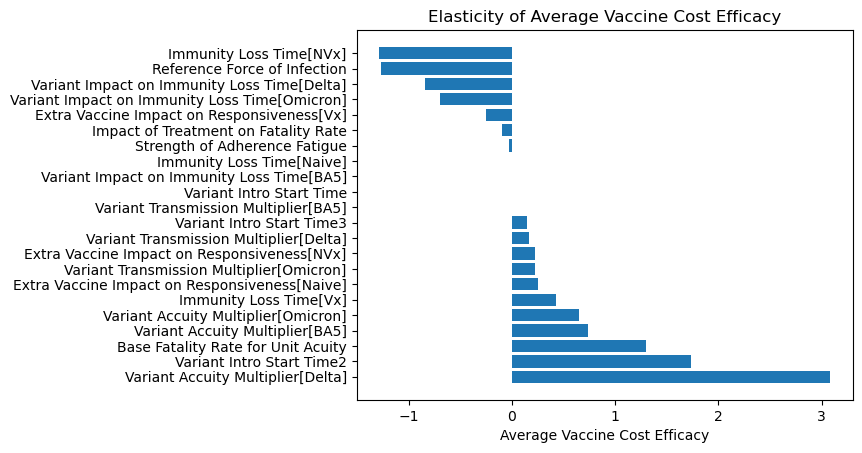

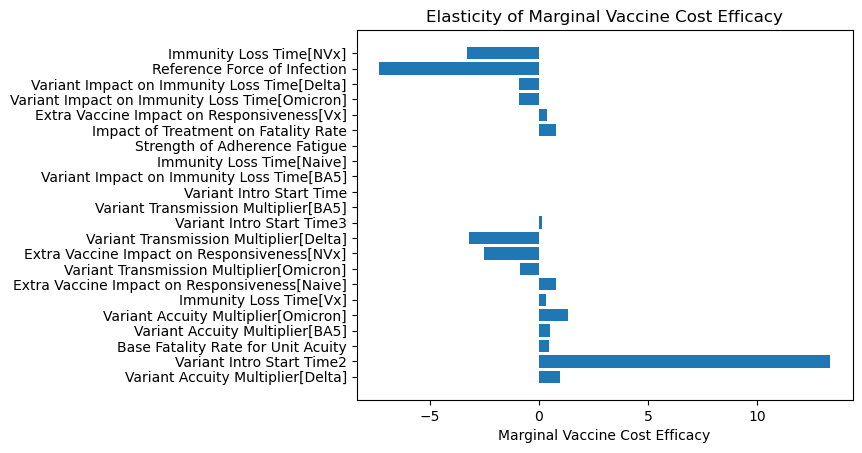

In [64]:
def plot_sensitivity(vds):
    matplotlib.pyplot.rcdefaults()
    fig_avg, ax_avg = matplotlib.pyplot.subplots()
    fig_marg, ax_marg = matplotlib.pyplot.subplots()

    x_avg=[avg for marg, avg in vds['VV_1_pv'].values]
    x_marg=[marg for marg, avg in vds['VV_1_pv'].values]
    x_label=[val for val in vds.params.values]
    y_vars=[x for x in range(len(vds['VV_1_pv']))]
    x_avg_sorted=[]
    x_marg_sorted=[]
    x_label_sorted=[]
    for avg, marg, label in sorted(zip(x_avg, x_marg, x_label)):
        x_avg_sorted.append(avg)
        x_marg_sorted.append(marg)
        x_label_sorted.append(label)

    ax_avg.barh(x_label_sorted, x_avg_sorted, align='center')
    ax_avg.set_yticks(y_vars)
    ax_avg.invert_yaxis()  # labels read top-to-bottom
    ax_avg.set_xlabel('Average Vaccine Cost Efficacy')
    ax_avg.set_title('Elasticity of Average Vaccine Cost Efficacy')

    ax_marg.barh(x_label_sorted, x_marg_sorted, align='center')
    ax_marg.set_yticks(y_vars)
    ax_marg.invert_yaxis()  # labels read top-to-bottom
    ax_marg.set_xlabel('Marginal Vaccine Cost Efficacy')
    ax_marg.set_title('Elasticity of Marginal Vaccine Cost Efficacy')

    matplotlib.pyplot.show()
    return

plot_sensitivity(vds)

In [20]:
vds.to_netcdf("vaccine_cost_efficiency_elasticity.nc")

## 4. Comparison plot for parameter estimation validation

In [104]:
df=pd.read_csv("Sim_DataAgg.csv", index_col=[0,1]).transpose()


/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_36329/2250191282.py:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  df.columns.set_levels(['Sim', 'Data'], level = 0, inplace = True)


Time      Data                         Sim                  
     Infection    Death     Test Infection    Death     Test
30         0.0    0.000     0.00       2.0    0.000     0.00
31         0.0    0.000     0.00       2.0    0.000     0.00
32         0.0    0.000     0.00       2.0    0.000     0.00
33         0.0    0.000     0.00       2.0    0.000     0.00
34         0.0    0.000     0.00       2.0    0.000     0.00
...        ...      ...      ...       ...      ...      ...
1096   74539.9  424.922  4766.88   30817.3  159.398  4039.59
1097   74523.2  424.484  4767.19   29739.3  152.852  4022.10
1098   74508.9  424.066  4767.60   28714.2  146.628  4005.46
1099   74497.0  423.669  4768.09   27739.4  140.708  3989.65
1100   74487.6  423.297  4768.69   26812.5  135.080  3974.60

[1071 rows x 6 columns]

In [105]:
df=pd.read_csv("Sim_DataAgg.csv", index_col=[0,1]).transpose()
df.columns.set_levels(['Sim', 'Data'], level = 0, inplace = True)
df.set_index(pd.date_range(start = '10/15/2019', periods = 1071), inplace=True)
df.columns.set_names(["sim_data", "component"], inplace=True)
#results.re(["sim", "data"])
#results.set_names(columns = {"SimAggregateSmmooth": "Sim", "DataAggregtaeSmooth": "Data"})
df
# .transpose()
# results.columns = 
# results.index = s
# results

/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_36329/712012553.py:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  df.columns.set_levels(['Sim', 'Data'], level = 0, inplace = True)


sim_data        Data                         Sim                  
component  Infection    Death     Test Infection    Death     Test
2019-10-15       0.0    0.000     0.00       2.0    0.000     0.00
2019-10-16       0.0    0.000     0.00       2.0    0.000     0.00
2019-10-17       0.0    0.000     0.00       2.0    0.000     0.00
2019-10-18       0.0    0.000     0.00       2.0    0.000     0.00
2019-10-19       0.0    0.000     0.00       2.0    0.000     0.00
...              ...      ...      ...       ...      ...      ...
2022-09-15   74539.9  424.922  4766.88   30817.3  159.398  4039.59
2022-09-16   74523.2  424.484  4767.19   29739.3  152.852  4022.10
2022-09-17   74508.9  424.066  4767.60   28714.2  146.628  4005.46
2022-09-18   74497.0  423.669  4768.09   27739.4  140.708  3989.65
2022-09-19   74487.6  423.297  4768.69   26812.5  135.080  3974.60

[1071 rows x 6 columns]

In [67]:
df

sim_data   SimAggregateSmooth                   DataAggregateSmooth           \
component           Infection    Death     Test           Infection    Death   
2019-10-15                0.0    0.000     0.00                 2.0    0.000   
2019-10-16                0.0    0.000     0.00                 2.0    0.000   
2019-10-17                0.0    0.000     0.00                 2.0    0.000   
2019-10-18                0.0    0.000     0.00                 2.0    0.000   
2019-10-19                0.0    0.000     0.00                 2.0    0.000   
...                       ...      ...      ...                 ...      ...   
2022-09-15            74539.9  424.922  4766.88             30817.3  159.398   
2022-09-16            74523.2  424.484  4767.19             29739.3  152.852   
2022-09-17            74508.9  424.066  4767.60             28714.2  146.628   
2022-09-18            74497.0  423.669  4768.09             27739.4  140.708   
2022-09-19            74487.6  423.297  4768.69             26812.5  135.080   

sim_data             
component      Test  
2019-10-15     0.00  
2019-10-16     0.00  
2019-10-17     0.00  
2019-10-18     0.00  
2019-10-19     0.00  
...             ...  
2022-09-15  4039.59  
2022-09-16  4022.10  
2022-09-17  4005.46  
2022-09-18  3989.65  
2022-09-19  3974.60  

[1071 rows x 6 columns]

<Axes: >

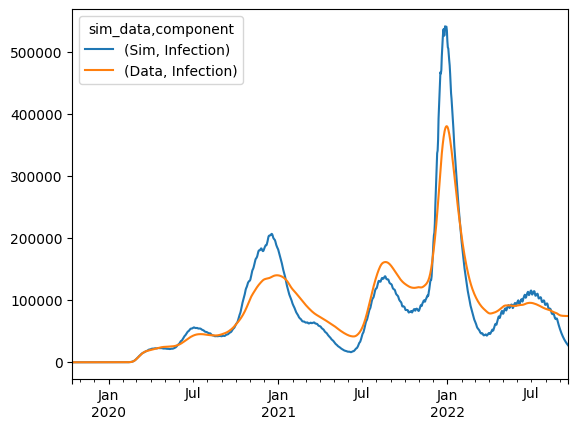

In [112]:
df.loc[:, [('Sim', 'Infection'), ('Data', 'Infection')]].plot()

In [106]:
sns.lineplot(ax=axes[0], x= df.index, y = df.loc[:, [('Sim', 'Infection'), ('Data', 'Infection')]]) #.unstack(), style="sim_data")

ValueError: Data must be 1-dimensional

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

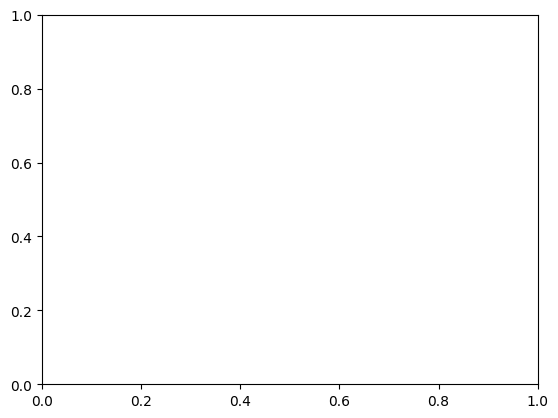

In [136]:
plt.xticks()

Text(0, 0.5, '')

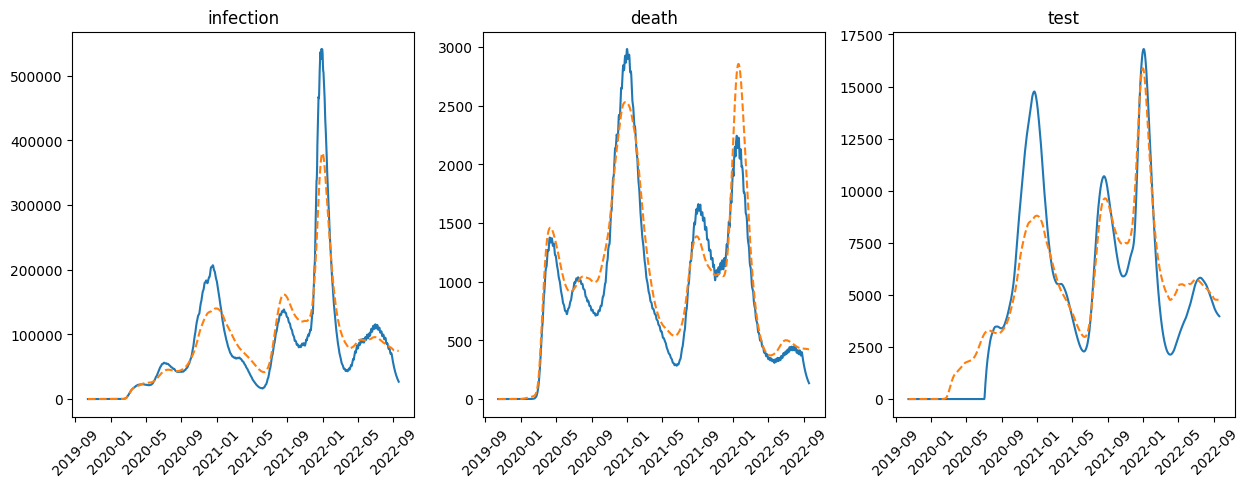

In [167]:
import matplotlib.ticker as ticker
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# infection
sns.lineplot(ax=axes[0], x= df.index, y = df.loc[:, ('Sim', 'Infection')])
sns.lineplot(ax=axes[0], x= df.index, y = df.loc[:, ('Data', 'Infection')], linestyle='--')
axes[0].set_title("infection")
axes[0].tick_params('x', labelrotation=45)
axes[0].set_ylabel("")
# # death
sns.lineplot(ax=axes[1], x= df.index, y = df.loc[:, ('Sim', 'Death')])
sns.lineplot(ax=axes[1], x= df.index, y = df.loc[:, ('Data', 'Death')], linestyle='--')
axes[1].set_title("death")
axes[1].tick_params('x', labelrotation=45)
axes[1].set_ylabel("")
# # test
sns.lineplot(ax=axes[2], x= df.index, y = df.loc[:, ('Sim', 'Test')])
sns.lineplot(ax=axes[2], x= df.index, y = df.loc[:, ('Data', 'Test')], linestyle='--')
axes[2].set_title("test")
axes[2].tick_params('x', labelrotation=45)
axes[2].set_ylabel("")



If you need disaggregation by state, use the following code:

In [ ]:
results=pd.read_csv("Covidtime_series.csv", index_col=["Time", "Unnamed: 1", "Unnamed: 2" ])

# print(results)

deaths_data=results.loc["Data Cumulative Deaths of Confirmed"]
deaths_data.dropna(inplace=True, how="all", axis=1)
deaths_sim=results.loc["Cumulative Deaths of Confirmed"]

deaths_sim.index.rename(inplace=True, names=["state", "empty"])
deaths_sim=deaths_sim.groupby(level=[0]).sum()
print(deaths_sim)

deaths_full=deaths_data.loc[["California", "New York", "Texas"]]
deaths_full.rename(index={
    "California":"California (Data)",
    "Texas":"Texas (Data)",
    "New York":"New York (Data)"
},inplace=True)
#print(deaths_full)
# deaths_full=pd.concat([deaths_full, deaths_sim.loc[["California", "New York", "Texas"], deaths_data.columns]])
# deaths_full.rename(index={
#     "California":"California (Sim)",
#     "Texas":"Texas (Sim)",
#     "New York":"New York (Sim)"
# },inplace=True)
# deaths_full.T.plot()
# # plt.pyplot.show()

# print(deaths_data)
# print(deaths_sim.loc[:, deaths_data.columns])
# gdp_data=results.loc['Real World GDP Data (Gt)""']
# gdp_data.dropna(inplace=True, how="all", axis=1)
# gdp_data.index.rename(inplace=True, names=["state", "empty"])
# gdp_data=gdp_data.droplevel("empty")
# gdp_sim=results.loc["Reported Cumulated GDP"]
# gdp_sim.dropna(inplace=True, how="all", axis=1)
# gdp_sim.index.rename(inplace=True, names=["state", "empty"])
# gdp_sim=gdp_sim.droplevel("empty")
# gdp_full=gdp_data.loc[["California", "New York", "Texas"]]
# gdp_full.rename(index={
#     "California":"California (Data)",
#     "Texas":"Texas (Data)",
#     "New York":"New York (Data)"
# },inplace=True)
# gdp_full=pandas.concat([gdp_full, gdp_sim.loc[["California", "New York", "Texas"]]])
# gdp_full.rename(index={
#     "California":"California (Sim)",
#     "Texas":"Texas (Sim)",
#     "New York":"New York (Sim)"
# },inplace=True)
#
# print(gdp_full)
# gdp_full.T.plot()
#plt.pyplot.show()

                       30   31   32   33   34   35   36   37   38   39  ...  \
state                                                                   ...   
Alabama               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Alaska                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Arizona               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Arkansas              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
California            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Colorado              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Connecticut           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Delaware              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
District of Columbia  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Florida               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Georgia               0.0  0.0  0.0  0.0  0.0  0.0  